# Predicting the age of an abalone

In [36]:
%matplotlib inline

#import packages
import pandas as pd
import numpy as np
import matplotlib
import sklearn.utils

#import modules
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

#import warning
from warnings import filterwarnings
filterwarnings('ignore')

#get the same results through the notebook
np.random.seed(42)

In [37]:
# Read data from abalone dataset.
abalone = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data', header=None)

In [38]:
abalone.columns = ['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings']

abalone.sample(n=5)

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
866,M,0.605,0.455,0.160,1.1035,0.4210,0.3015,0.325,9
1483,M,0.590,0.440,0.150,0.8725,0.3870,0.2150,0.245,8
599,F,0.560,0.445,0.195,0.9810,0.3050,0.2245,0.335,16
1702,F,0.635,0.490,0.170,1.2615,0.5385,0.2665,0.380,9
670,M,0.475,0.385,0.145,0.6175,0.2350,0.1080,0.215,14


In [39]:
abalone.shape

(4177, 9)

In [40]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
sex               4177 non-null object
length            4177 non-null float64
diameter          4177 non-null float64
height            4177 non-null float64
whole_weight      4177 non-null float64
shucked_weight    4177 non-null float64
viscera_weight    4177 non-null float64
shell_weight      4177 non-null float64
rings             4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [41]:
numeric_features = abalone.select_dtypes(include=['float64'])
print(numeric_features.columns)

Index(['length', 'diameter', 'height', 'whole_weight', 'shucked_weight',
       'viscera_weight', 'shell_weight'],
      dtype='object')


In [42]:
categorical_features = abalone.select_dtypes(include=['object'])
print(categorical_features.columns)

Index(['sex'], dtype='object')


In [43]:
abalone['rings'] = abalone['rings'].astype(np.float64)

In [44]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
sex               4177 non-null object
length            4177 non-null float64
diameter          4177 non-null float64
height            4177 non-null float64
whole_weight      4177 non-null float64
shucked_weight    4177 non-null float64
viscera_weight    4177 non-null float64
shell_weight      4177 non-null float64
rings             4177 non-null float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


In [45]:
abalone.sample(n=5)

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
1624,M,0.565,0.440,0.125,0.8020,0.3595,0.1825,0.215,9.0
586,I,0.520,0.425,0.170,0.6805,0.2800,0.1740,0.195,10.0
384,M,0.545,0.425,0.135,0.8445,0.3730,0.2100,0.235,10.0
3227,F,0.450,0.350,0.135,0.5600,0.2310,0.1370,0.145,13.0
22,F,0.565,0.440,0.155,0.9395,0.4275,0.2140,0.270,12.0


In [46]:
abalone.isnull().sum()

sex               0
length            0
diameter          0
height            0
whole_weight      0
shucked_weight    0
viscera_weight    0
shell_weight      0
rings             0
dtype: int64

## Check for correlations

Text(0.5, 1, 'selecting best features')

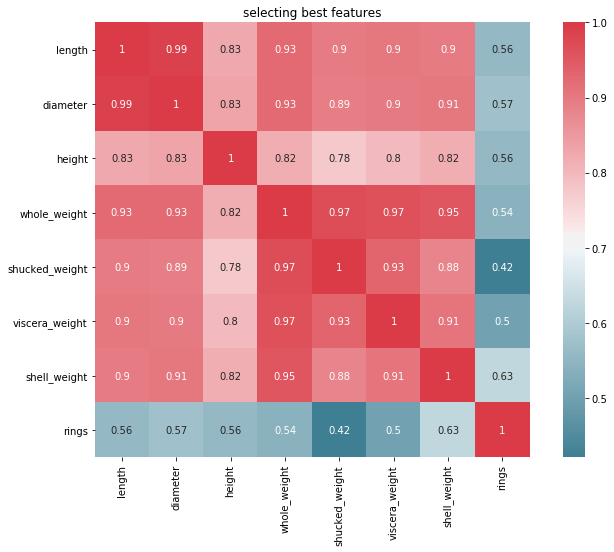

In [47]:
import seaborn as sns

f, ax = plt.subplots(figsize=(12, 8))
corr = abalone.corr().round(3)
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True).set_title('selecting best features')

### alternative correlation check

In [48]:
corr_matrix = abalone.corr()
corr_matrix['rings'].sort_values(ascending=False)

rings             1.000000
shell_weight      0.627574
diameter          0.574660
height            0.557467
length            0.556720
whole_weight      0.540390
viscera_weight    0.503819
shucked_weight    0.420884
Name: rings, dtype: float64

## Prepare the data for Machine Learning Algorithms
    . Data cleaning
    . Handling categorical and numeric features
    . Transformers
    . Feature scaling
    . Transformation pipelines

In [49]:
# create the preprocessing pipelines for numeric data
numeric_features = ['length', 'diameter', 'height', 'whole_weight', 'shell_weight', 'viscera_weight', 'shucked_weight']
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# create the preprocessing pipelines for categorical data
categorical_features = ['sex']
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

# preprocessor process
preprocessor = ColumnTransformer(transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

abalone_prepared = preprocessor.fit_transform(abalone)

# Append classifier to preprocessing pipeline
# Now we have a full prediction pipeline
#clf = Pipeline(steps=[('preprocessor', preprocessor),
                      #('classifier', RandomForestRegressor(n_estimators=100))])

In [50]:
abalone_prepared.shape

(4177, 10)

## Prepare the data for training

In [51]:
abalone1 = abalone.copy()

# separating the feature vecotrs and the target values
X = abalone1.drop('rings', axis =1)
y = abalone1['rings']

X.columns

Index(['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight',
       'viscera_weight', 'shell_weight'],
      dtype='object')

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(len(X_train), "train +", len(y_test), "test")

3341 train + 836 test


## Training and evaluating on the training set

In [55]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(abalone_prepared)
abalone_prepared[0]

array([-0.57455813, -0.43214879, -1.06442415, -0.64189823, -0.63821689,
       -0.72621157, -0.60768536,  0.        ,  0.        ,  1.        ])

In [56]:
X_poly[0]

array([-0.57455813, -0.43214879, -1.06442415, -0.64189823, -0.63821689,
       -0.72621157, -0.60768536,  0.        ,  0.        ,  1.        ,
        0.33011705,  0.2482946 ,  0.61157355,  0.36880785,  0.3666927 ,
        0.41725077,  0.34915057, -0.        , -0.        , -0.57455813,
        0.18675258,  0.45998961,  0.27739554,  0.27580466,  0.31383146,
        0.2626105 , -0.        , -0.        , -0.43214879,  1.13299876,
        0.68325197,  0.67933347,  0.77299713,  0.64683498, -0.        ,
       -0.        , -1.06442415,  0.41203334,  0.40967029,  0.46615392,
        0.39007216, -0.        , -0.        , -0.64189823,  0.4073208 ,
        0.46348049,  0.38783506, -0.        , -0.        , -0.63821689,
        0.52738325,  0.44130814, -0.        , -0.        , -0.72621157,
        0.3692815 , -0.        , -0.        , -0.60768536,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ])

In [57]:
linp_reg = LinearRegression()
linp_reg.fit(X_poly, y)

print("Accuracy score (training): {0:.3f}".format(linp_reg.score(X_poly, y)))
#linp_reg.intercept_, linp_reg.coef_

Accuracy score (training): 0.591


In [58]:
lin_reg = LinearRegression()
lin_reg.fit(abalone_prepared, y)

print("Accuracy score (training): {0:.3f}".format(lin_reg.score(abalone_prepared, y)))
#print("Accuracy score (test): {0:.3f}".format(lin_clf.score(X_test, y_test)))

Accuracy score (training): 0.537


In [59]:
rfg_reg = RandomForestRegressor(n_estimators=100)
rfg_reg.fit(abalone_prepared, y)

print("Accuracy score (training): {0:.3f}".format(rfg_reg.score(abalone_prepared, y)))

Accuracy score (training): 0.937


In [60]:
def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard deviation:', scores.std())

In [61]:
from sklearn.tree import DecisionTreeRegressor

dtr_reg = DecisionTreeRegressor()
dtr_reg.fit(abalone_prepared, y)

#print("Accuracy score (training): {0:.3f}".format(dtr_reg.score(abalone_prepared, y)))

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [62]:
from sklearn.metrics import mean_squared_error

abalone_predictions = dtr_reg.predict(abalone_prepared)
dtr_mse = mean_squared_error(y, abalone_predictions)
dtr_rmse = np.sqrt(dtr_mse)
dtr_rmse

0.0

In [63]:
from sklearn.model_selection import cross_val_score

dtr_scores = cross_val_score(dtr_reg, abalone_prepared, y, scoring="neg_mean_squared_error", cv=10)
dtr_rmse_scores = np.sqrt(-dtr_scores)
display_scores(dtr_rmse_scores) # greater is better

Scores: [3.70793795 4.01641369 2.46312518 2.91875637 2.47861668 3.8235608
 2.28789199 3.14478747 2.63894463 3.09985689]
Mean: 3.0579891661792216
Standard deviation: 0.5842916364326984


## Fine-tune your model

In [64]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': np.arange(2, 8)}

dtr_reg = DecisionTreeRegressor(random_state=42)

grid_search = GridSearchCV(dtr_reg, param_grid, cv=5, error_score='raise-deprecating', return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)
grid_search.fit(abalone_prepared, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=42,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [65]:
grid_search.best_params_

{'max_depth': 5}

In [66]:
grid_search.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [67]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

2.7163995166493247 {'max_depth': 2}
2.6056673890819186 {'max_depth': 3}
2.480999236134469 {'max_depth': 4}
2.4075516565956656 {'max_depth': 5}
2.4692614499022585 {'max_depth': 6}
2.5316802851706206 {'max_depth': 7}


In [68]:
final_model = grid_search.best_estimator_

X_test = abalone1.drop('rings', axis=1)
y_test = abalone1['rings'].copy()

X_test_prepared = preprocessor.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

2.171270490200251
